In [1]:
import arviz as az
import json


In [2]:
# load output from fitted model
az_fit = az.from_json("model_output/model_3_voter_bias_vector_1000_samples_3_chains_1998-2018.json")

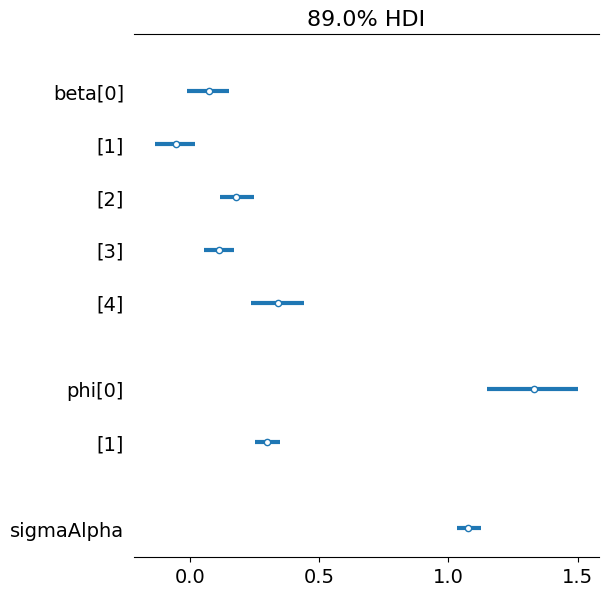

In [3]:
axes = az.plot_forest(az_fit,
                        kind='forestplot',
                        combined=True,
                        quartiles=False,
                        hdi_prob=0.89,
                        var_names=['beta','phi','sigmaAlpha']
                        )

In [4]:
# sort alpha parameters based on mean, and print highest 5 means
alpha_mean = az_fit.posterior.alpha.to_numpy().mean(axis=(0,1))
print(alpha_mean.argsort()[-5:])

[1843 1771 1404 1819  949]


In [5]:
# generate sets of vp indicies for each performer (to show bias from each voter)
with open('generated_objects/vptoi.json') as f:
    vptoi = f.read()
vptoi = json.loads(vptoi)
with open('generated_objects/itovp.json') as f:
    itovp = f.read()
itovp = json.loads(itovp)

votersforp = {}
for pair,idx in vptoi.items():
    v = pair[:2]; p = pair[-2:]
    voters = votersforp.get(p)
    if voters:
        voters.append(idx)
    else:
        votersforp[p] = [idx]

with open('generated_objects/voterforp.json', 'w') as f:
    json.dump(votersforp,f)



In [6]:
print(az_fit.posterior.alpha_dim_0)
az_relabelled = az_fit.copy()
label_arr = [None] * len(vptoi)
for pair,idx in vptoi.items():
    label_arr[idx] = pair
print(label_arr)
az_relabelled.posterior['alpha_dim_0'] = label_arr


<xarray.DataArray 'alpha_dim_0' (alpha_dim_0: 2175)>
array([   0,    1,    2, ..., 2172, 2173, 2174])
Coordinates:
  * alpha_dim_0  (alpha_dim_0) int64 0 1 2 3 4 5 ... 2170 2171 2172 2173 2174
['AD-AL', 'AM-AL', 'AT-AL', 'AU-AL', 'AZ-AL', 'BA-AL', 'BE-AL', 'BG-AL', 'BY-AL', 'CH-AL', 'CY-AL', 'CZ-AL', 'DE-AL', 'DK-AL', 'EE-AL', 'ES-AL', 'FI-AL', 'FR-AL', 'GB-AL', 'GE-AL', 'GR-AL', 'HR-AL', 'HU-AL', 'IE-AL', 'IL-AL', 'IS-AL', 'IT-AL', 'LT-AL', 'LV-AL', 'MC-AL', 'MD-AL', 'ME-AL', 'MK-AL', 'MT-AL', 'NL-AL', 'NO-AL', 'PL-AL', 'PT-AL', 'RO-AL', 'RS-AL', 'RU-AL', 'SE-AL', 'SI-AL', 'SK-AL', 'SM-AL', 'TR-AL', 'UA-AL', 'YU-AL', 'AD-AM', 'AL-AM', 'AT-AM', 'AU-AM', 'AZ-AM', 'BA-AM', 'BE-AM', 'BG-AM', 'BY-AM', 'CH-AM', 'CY-AM', 'CZ-AM', 'DE-AM', 'DK-AM', 'EE-AM', 'ES-AM', 'FI-AM', 'FR-AM', 'GB-AM', 'GE-AM', 'GR-AM', 'HR-AM', 'HU-AM', 'IE-AM', 'IL-AM', 'IS-AM', 'IT-AM', 'LT-AM', 'LV-AM', 'MC-AM', 'MD-AM', 'ME-AM', 'MK-AM', 'MT-AM', 'NL-AM', 'NO-AM', 'PL-AM', 'PT-AM', 'RO-AM', 'RS-AM', 'RU-AM', 'SE-A

In [12]:
# plotting function for a sorted forest plot for a given performer
def sorted_forest_plot(country_code):
    alpha_means = az_relabelled.posterior.alpha[:,:,votersforp[country_code]].mean(("chain","draw"))
    sorted_plot_data = az_relabelled.posterior.alpha[:,:,votersforp[country_code]].sortby(alpha_means,ascending=False)
    axes = az.plot_forest(sorted_plot_data,
                            kind='forestplot',
                            combined=True,
                            quartiles=False,
                            hdi_prob=0.89,
                            figsize=(8,14)
                            )
    axes[0].set_title(f'bias when voting for {country_code}')

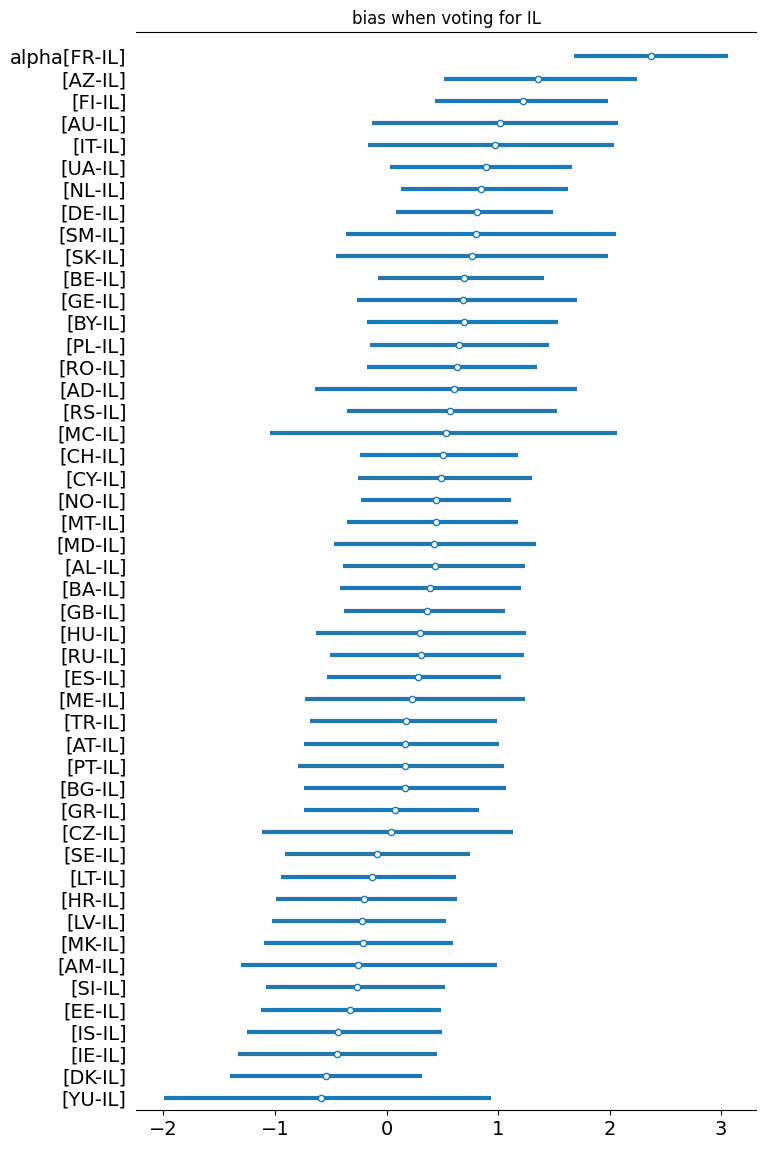

In [13]:
sorted_forest_plot('IL')
